# Metrics for fundamental matrix calculations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%run calc_adelaide_metrics.py

/Volumes/zorg/mb312/dev_trees/test-fundamental-matrices/calc_adelaide_metrics.py:152: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `FundamentalMatrixTransform.from_estimate` class constructor instead.
  assert tf.estimate(src, dst)
/Volumes/zorg/mb312/dev_trees/test-fundamental-matrices/calc_adelaide_metrics.py:179: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `FundamentalMatrixTransform.from_estimate` class constructor instead.
  assert tf.estimate(train_s, train_d)


In [3]:
df = pd.read_csv('adelaide_rmf_metrics.csv')
df.head()

,dataset,rms-mad,mrs-mad,rms2-mad,cv28-mad,rms-rmsd,mrs-rmsd,rms2-rmsd,cv28-rmsd
0,barrsmith,0.934068,0.934068,0.934068,0.934678,2.267168,2.267168,2.267168,2.267442
1,biscuit,0.741252,0.741252,0.741252,0.740618,1.323534,1.323534,1.323534,1.322682
2,biscuitbook,19.753195,19.753195,19.753195,19.927762,31.657677,31.657677,31.657677,31.853235
3,biscuitbookbox,11.172396,11.172396,11.172396,11.203209,18.495946,18.495946,18.495946,18.545027
4,boardgame,21.901874,21.901874,21.901874,21.738514,66.046171,66.046171,66.046171,63.654089


In [4]:
df.loc[:, 'rms-mad':].describe()

,rms-mad,mrs-mad,rms2-mad,cv28-mad,rms-rmsd,mrs-rmsd,rms2-rmsd,cv28-rmsd
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,8.902187,8.902187,8.902187,9.214056,19.918204,19.918204,19.918204,20.540671
std,14.493098,14.493098,14.493098,15.499965,33.727523,33.727523,33.727523,35.717730
min,0.231463,0.231463,0.231463,0.231633,0.425984,0.425984,0.425984,0.426123
25%,0.582263,0.582263,0.582263,0.582111,1.334570,1.334570,1.334570,1.333795
50%,1.142910,1.142910,1.142910,1.141577,2.326126,2.326126,2.326126,2.322790
75%,11.497933,11.497933,11.497933,11.520237,19.600175,19.600175,19.600175,19.675472
max,56.014520,56.014520,56.014520,63.940441,118.252473,118.252473,118.252473,132.437101


In [5]:
df['mad-mrs-better'] = df['mrs-mad'] < df['rms-mad']
df['rmsd-mrs-better'] = df['mrs-rmsd'] < df['rms-rmsd']
df.loc[:, 'mad-mrs-better':].mean()

mad-mrs-better     0.0
rmsd-mrs-better    0.0
dtype: float64

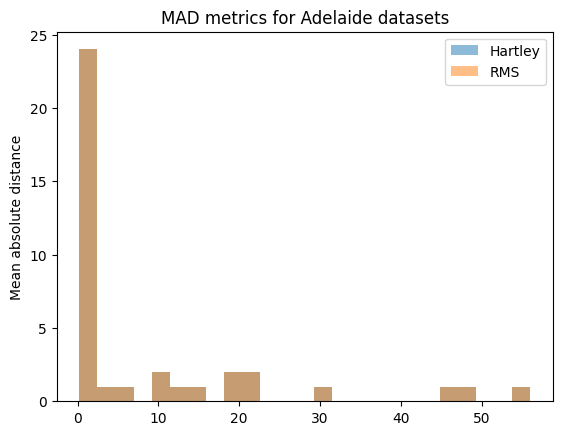

In [6]:
plt.hist(df['mrs-mad'], alpha=0.5, bins=25, label='Hartley')
plt.hist(df['rms-mad'], alpha=0.5, bins=25, label='RMS')
plt.legend()
plt.ylabel('Mean absolute distance')
plt.title('MAD metrics for Adelaide datasets');

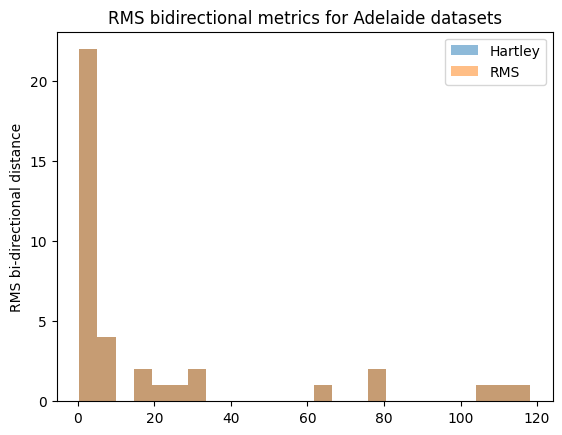

In [7]:
plt.hist(df['mrs-rmsd'], alpha=0.5, bins=25, label='Hartley')
plt.hist(df['rms-rmsd'], alpha=0.5, bins=25, label='RMS')
plt.legend()
plt.ylabel('RMS bi-directional distance')
plt.title('RMS bidirectional metrics for Adelaide datasets');

## Train - test metrics

In [8]:
df = pd.read_csv('adelaide_rmf_tt_metrics.csv')
df.head()

,dataset,rms-mad,mrs-mad,rms2-mad,cv28-mad,rms-rmsd,mrs-rmsd,rms2-rmsd,cv28-rmsd
0,barrsmith,1.098061,1.098061,1.098061,1.097911,2.865125,2.865125,2.865125,2.863819
1,biscuit,0.748149,0.748149,0.748149,0.750987,1.307401,1.307401,1.307401,1.310440
2,biscuitbook,21.710043,21.710043,21.710043,21.913656,34.165772,34.165772,34.165772,34.442904
3,biscuitbookbox,13.960112,13.960112,13.960112,14.004386,23.170352,23.170352,23.170352,23.246661
4,boardgame,18.978077,18.978077,18.978077,18.721804,44.373055,44.373055,44.373055,44.502960


In [9]:
df.loc[:, 'rms-mad':].describe()

,rms-mad,mrs-mad,rms2-mad,cv28-mad,rms-rmsd,mrs-rmsd,rms2-rmsd,cv28-rmsd
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,9.458572,9.458572,9.458572,9.363654,19.788974,19.788974,19.788974,19.952679
std,15.503566,15.503566,15.503566,15.286728,34.000690,34.000690,34.000690,34.670238
min,0.338506,0.338506,0.338506,0.338507,0.635727,0.635727,0.635727,0.635738
25%,0.601270,0.601270,0.601270,0.595922,1.395648,1.395648,1.395648,1.396300
50%,1.931843,1.931843,1.931843,1.920265,3.980474,3.980474,3.980474,3.945086
75%,13.570880,13.570880,13.570880,13.551018,22.105547,22.105547,22.105547,22.051503
max,57.302612,57.302612,57.302612,58.792231,126.816614,126.816614,126.816614,138.592537
